In [19]:
template1=(5,5)

In [20]:
def Mape(predict, observed):
  absolute_diff_percentage =  abs( (predict - observed) / observed)
  # print(f'Each diff ratio on each hour: {absolute_diff_percentage}')
  sum_abs_diff = sum(absolute_diff_percentage)
  # print()
  # print(f'SUM: {sum_abs_diff}')

  mape = (sum_abs_diff / len(predict))*100 #パーセント表記
  print(f'MAPE : {mape:.1f} %')
  #mape は GroudTruth を基準にしたときの予測値のずれの比率について，全データを計算したときの，データ1つあたりの平均

In [21]:
def RMSE(predict, observed):
    squared_diff = (predict - observed) ** 2
    sum_squared_diff = sum(squared_diff)
    mse = sum_squared_diff / len(predict)
    rmse = mse ** 0.5  # 平方根を取る
    print(f'RMSE : {rmse:.3f}')
    # RMSEはGroundTruthと予測値の差の二乗平均をとったもの

def MSE(predict, observed):
    squared_diff = (predict - observed) ** 2
    sum_squared_diff = sum(squared_diff)
    mse = sum_squared_diff / len(predict)
    print(f'MSE : {mse:.3f}')
    # MSEはGroundTruthと予測値の差の二乗平均

# LSTM

### Import vars from LSTM (with weather, warning) pickle

In [22]:
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/L1_exo/20241015-0111-45/vars_exoTrue.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
loaded_true_train_start_date = data['train_start_date']
loaded_true_train_end_date = data['train_end_date']
loaded_true_test_start_date = data['test_start_date']
loaded_true_test_end_date = data['test_end_date']

# test set
loaded_true_date_rng = data['date_rng']
loaded_true_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_true_predicted_date_rng = data['predicted_date_rng']
loaded_true_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
loaded_df_ex = data['df_ex']


# データ加工
import pandas as pd

df_test=pd.DataFrame({'pop':loaded_true_df_test_inversed_plt},index=loaded_true_date_rng)
df_true_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_true_predicted_test_plot_inversed_plt},index=loaded_true_predicted_date_rng)

### Import vars from LSTM (with only weather) pickle

In [23]:
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/aggregate/20240920-001616/vars.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
loaded_false_train_start_date = data['train_start_date']
loaded_false_train_end_date = data['train_end_date']
loaded_false_test_start_date = data['test_start_date']
loaded_false_test_end_date = data['test_end_date']

# test set
loaded_false_date_rng = data['date_rng']
loaded_false_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_false_predicted_date_rng = data['predicted_date_rng']
loaded_false_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
loaded_false_df_ex = data['df_ex']


# データ加工
import pandas as pd
# df_test=pd.DataFrame({'pop':loaded_false_df_test_inversed_plt},index=loaded_false_date_rng)
df_false_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_false_predicted_test_plot_inversed_plt},index=loaded_false_predicted_date_rng)

### Import vars from LSTM (without exo) pickle

In [24]:
import pickle
import os

# 読み込み用のパス
pickle_path = (f'/home/shin/lab/00_project/LSTM/pickles/L1_pop/20241015-0143-55/vars_exoFalse.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
# loaded_false_train_start_date = data['train_start_date']
# loaded_false_train_end_date = data['train_end_date']
# loaded_false_test_start_date = data['test_start_date']
# loaded_false_test_end_date = data['test_end_date']

# test set
loaded_pop_date_rng = data['date_rng']
loaded_pop_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_pop_predicted_date_rng = data['predicted_date_rng']
loaded_pop_predicted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
# loaded_false_df_ex = data['df_ex']


# データ加工
import pandas as pd
# df_test=pd.DataFrame({'pop':loaded_pop_df_test_inversed_plt},index=loaded_pop_date_rng)
df_pop_LSTM_withexo_predicted=pd.DataFrame({'pop':loaded_pop_predicted_test_plot_inversed_plt},index=loaded_pop_predicted_date_rng)

### LSTM vs LSTM 

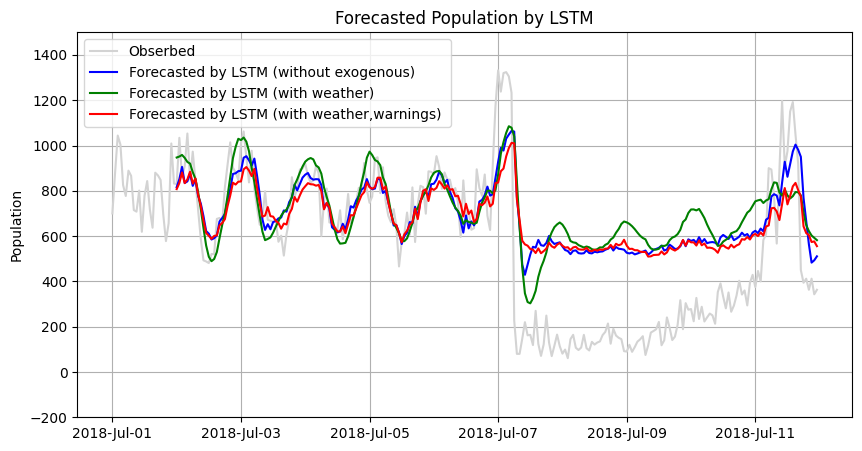

In [41]:
import matplotlib.pyplot as plt

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(10, 5))  # Figureサイズの設定 (幅, 高さ)

# データのプロット
ax.plot(df_test, label='Obserbed',color='lightgray')
ax.plot(df_pop_LSTM_withexo_predicted, label='Forecasted by LSTM (without exogenous)',color='blue')
ax.plot(df_false_LSTM_withexo_predicted, label='Forecasted by LSTM (with weather)',color='green')
ax.plot(df_true_LSTM_withexo_predicted, label='Forecasted by LSTM (with weather,warnings) ',color='red')


import matplotlib.dates as mdates
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax.xaxis.set_major_formatter(formatter)
# x軸のラベルを90度回転
# plt.xticks(rotation=90)

ax.set_ylim(-200, 1500)
ax.legend()
ax.grid()
ax.set_title('Forecasted Population by LSTM')
ax.set_ylabel('Population')

# グラフを表示
plt.show()

In [26]:
print('LSTM with weather,warnings')
Mape(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
RMSE(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
print()

print('LSTM with weather')
Mape(df_false_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])
RMSE(df_false_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])
print()
print('LSTM without exo')
Mape(df_pop_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])
RMSE(df_pop_LSTM_withexo_predicted['pop'],df_test.iloc[-240:,0])

LSTM with weather,warnings
MAPE : 108.2 %
RMSE : 261.157

LSTM with weather
MAPE : 117.0 %
RMSE : 284.377

LSTM without exo
MAPE : 107.8 %
RMSE : 258.102


# SARIMAX

### Import vars from SARIMAX (with exo) pickle

In [27]:
## pickleで保存したファイルを読み込み
import pickle

with open(f'./SARIMAX/pickles/20240922-091947/vars.pickle', mode='rb') as fi:
    data = pickle.load(fi)

### 保存した変数を個別に取得 (全て '_loaded' を付けた形に変更)
loaded_true_start_test_date = data['start_test_date']
loaded_true_end_test_date = data['end_test_date']
loaded_true_predict_timeline_list = data['predict_timeline_list']
loaded_true_predict_value_list = data['predict_value_list']
loaded_true_all_concated = data['all_concated']
# loaded_true_train_days = data['train_days']  

# マイナスの値をゼロに書き換える
loaded_true_predict_value_list = [0 if x < 0 else x for x in loaded_true_predict_value_list]

### Import vars from SARIMAX (without exo) pickle

In [28]:
## pickleで保存したファイルを読み込み
import pickle

with open(f'./SARIMAX/pickles/20241015-221621/vars.pickle', mode='rb') as fi:
    data = pickle.load(fi)

### 保存した変数を個別に取得 (全て '_loaded' を付けた形に変更)
loaded_false_start_test_date = data['start_test_date']
loaded_false_end_test_date = data['end_test_date']
loaded_false_predict_timeline_list = data['predict_timeline_list']
loaded_false_predict_value_list = data['predict_value_list']
# loaded_false_all_concated = data['all_concated']
# loaded_false_train_days = data['train_days']  

# マイナスの値をゼロに書き換える
loaded_false_predict_value_list = [0 if x < 0 else x for x in loaded_false_predict_value_list]

#### Set date

In [29]:
from datetime import datetime

train_start_date    = '2018-04-01 00:00:00'
train_end_date      = '2018-06-30 23:59:59'
test_start_date     = '2018-07-01 00:00:00'
test_end_date       = '2018-07-11 23:59:59'

train_st = datetime.strptime(train_start_date, '%Y-%m-%d %H:%M:%S')
train_en = datetime.strptime(train_end_date, '%Y-%m-%d %H:%M:%S')
test_st = datetime.strptime(test_start_date, '%Y-%m-%d %H:%M:%S')
test_en = datetime.strptime(test_end_date, '%Y-%m-%d %H:%M:%S')

train_pop = loaded_true_all_concated[train_st:train_en]['pop_hours']
test_pop  = loaded_true_all_concated[test_st:test_en]['pop_hours']

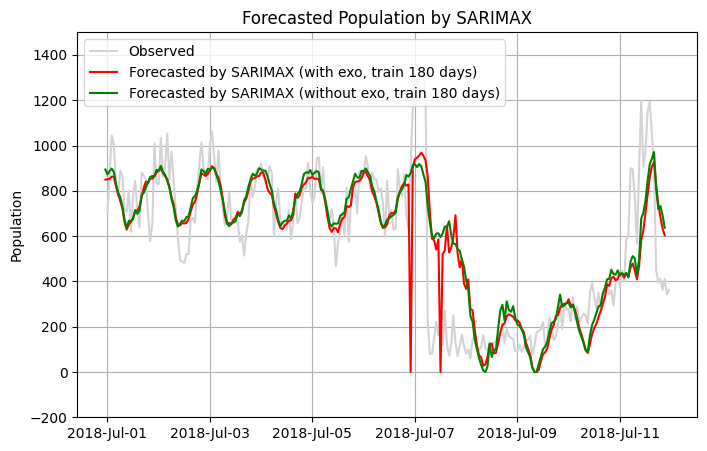

In [30]:
import matplotlib.pyplot as plt

fig, ax,  = plt.subplots(figsize=(8, 5))

ax.plot(loaded_true_all_concated[test_st:test_en]['pop_hours'], label='Observed',color='lightgray')
ax.plot(loaded_true_predict_timeline_list, loaded_true_predict_value_list, label='Forecasted by SARIMAX (with exo, train 180 days)',color='red')
ax.plot(loaded_false_predict_timeline_list, loaded_false_predict_value_list, label='Forecasted by SARIMAX (without exo, train 180 days)',color='green')
ax.set_ylim(-200, 1500)
ax.set_title('Forecasted Population by SARIMAX')
ax.set_ylabel('Population')
ax.grid()
ax.legend()

import matplotlib.dates as mdates
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax.xaxis.set_major_formatter(formatter)

# グラフの表示
# plt.tight_layout()  # レイアウトを自動調整
plt.show()

In [31]:
print('red')
Mape(loaded_true_predict_value_list,test_pop[:len(loaded_true_predict_value_list)])
RMSE(loaded_true_predict_value_list,test_pop[:len(loaded_true_predict_value_list)])

print('green')
Mape(loaded_false_predict_value_list,test_pop[:len(loaded_true_predict_value_list)])
RMSE(loaded_false_predict_value_list,test_pop[:len(loaded_true_predict_value_list)])

red
MAPE : 53.4 %
RMSE : 205.632
green
MAPE : 54.8 %
RMSE : 195.110


# Compare

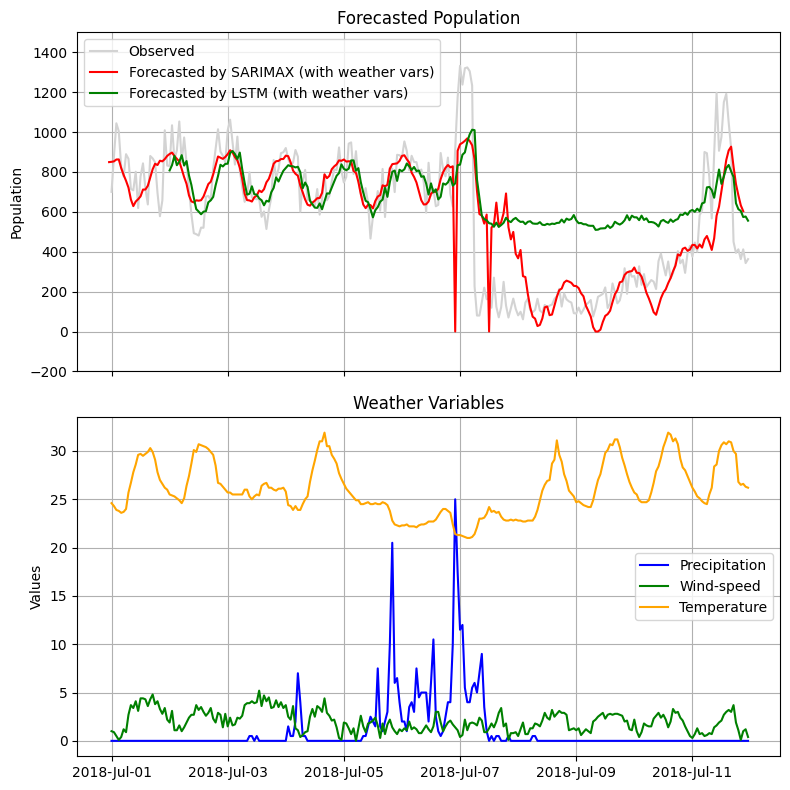

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 2つのグラフを作成 (2行1列)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8),sharex=True)

# 上のグラフ
ax1.plot(loaded_true_all_concated[test_st:test_en]['pop_hours'], label='Observed',color='lightgray')
ax1.plot(loaded_true_predict_timeline_list, loaded_true_predict_value_list, label='Forecasted by SARIMAX (with weather vars)',color='red')
ax1.plot(df_true_LSTM_withexo_predicted, label='Forecasted by LSTM (with weather vars)',color='Green')
ax1.set_ylim(-200, 1500)
ax1.set_title('Forecasted Population')
ax1.set_ylabel('Population')
ax1.grid()
ax1.legend()

# 下のグラフ
ax2.plot(loaded_true_all_concated[test_st:test_en]['y_precipitation'], label='Precipitation', color='blue')
ax2.plot(loaded_true_all_concated[test_st:test_en]['y_windspeed'], label='Wind-speed', color='green')
ax2.plot(loaded_true_all_concated[test_st:test_en]['y_temperature'], label='Temperature', color='orange')
ax2.set_title('Weather Variables')
ax2.set_ylabel('Values')
ax2.grid()
ax2.legend()


# フォーマットを月単位に設定
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax2.xaxis.set_major_formatter(formatter)

# x軸のラベルを縦向きに回転
# ax2.tick_params(axis='x', rotation=90)

# 両方のグラフに共通のx軸ラベル
# fig.supxlabel('Date')

# グラフの表示
plt.tight_layout()  # レイアウトを自動調整
plt.show()


In [33]:
print('LSTM    with exo ')
Mape(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
RMSE(df_true_LSTM_withexo_predicted['pop'],df_test.iloc[-len(df_true_LSTM_withexo_predicted['pop']):,0])
print()

print('SARIMAX with exo ')
Mape(loaded_true_predict_value_list,test_pop[:263])
RMSE(loaded_true_predict_value_list,test_pop[:263])

LSTM    with exo 
MAPE : 108.2 %
RMSE : 261.157

SARIMAX with exo 
MAPE : 53.4 %
RMSE : 205.632


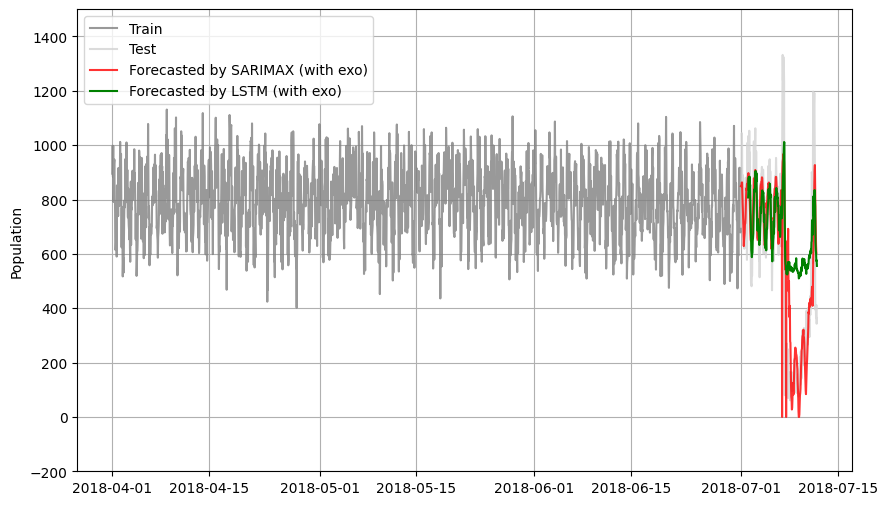

In [34]:
import matplotlib.pyplot as plt
alpha=0.8

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(10, 6))  # Figureサイズの設定 (幅, 高さ)

# データのプロット
ax.plot(train_pop, label='Train',color='gray',alpha=alpha)
ax.plot(test_pop, label='Test',color='lightgray',alpha=alpha)
ax.plot(loaded_true_predict_timeline_list, loaded_true_predict_value_list, label='Forecasted by SARIMAX (with exo)',color='red',alpha=alpha)
ax.plot(df_true_LSTM_withexo_predicted, label='Forecasted by LSTM (with exo)',color='Green')


# y軸の範囲を設定
ax.set_ylim(-200, 1500)

# 凡例を表示
ax.legend()
ax.grid()
ax.set_ylabel('Population')

# グラフを表示
plt.show()

# BOX plot (LSTM)

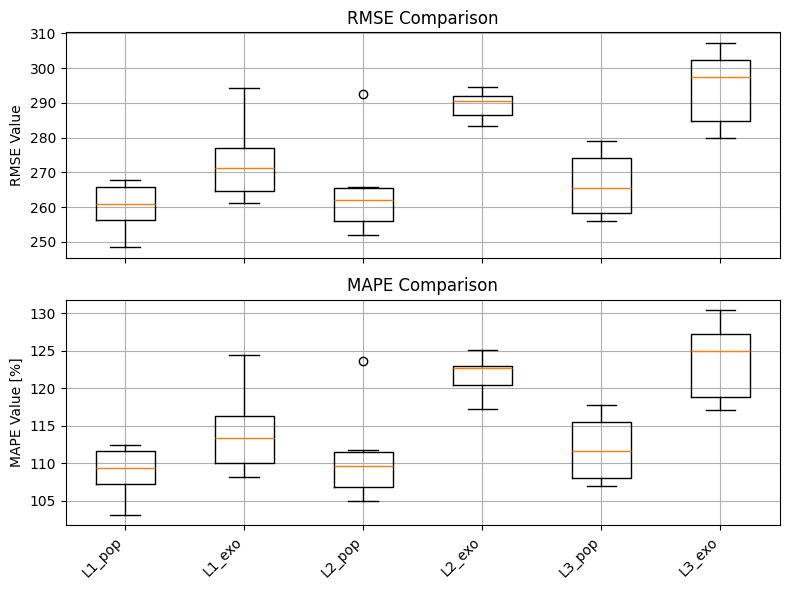

In [ ]:
import matplotlib.pyplot as plt
import os
import sys

# 現在の作業ディレクトリを取得
current_dir = os.getcwd()
module_folder = 'sharing'
module_path = os.path.join(current_dir, module_folder)

sys.path.append(module_path)

import evaluate

# パスのリスト（合計12）
paths = {
    'L1_pop': './LSTM/pickles/L1_pop',
    # 'L1_pop_split_20': './LSTM/pickles/L1_pop_split_20',
    'L1_exo': './LSTM/pickles/L1_exo',
    # 'L1_exo_split_20': './LSTM/pickles/L1_exo_split_20',
    'L2_pop': './LSTM/pickles/L2_pop',
    # 'L2_pop_split_20': './LSTM/pickles/L2_pop_split_20',
    'L2_exo': './LSTM/pickles/L2_exo',
    # 'L2_exo_split_20': './LSTM/pickles/L2_exo_split_20',
    'L3_pop': './LSTM/pickles/L3_pop',
    # 'L3_pop_split_20': './LSTM/pickles/L3_pop_split_20',
    'L3_exo': './LSTM/pickles/L3_exo',
    # 'L3_exo_split_20': './LSTM/pickles/L3_exo_split_20'
}

# 各モデルの評価メトリクスを格納するリスト
list_rmse = []
list_mape = []

# 各パスに対してデータを取得
for path_key, path_value in paths.items():
    model = evaluate.MetricsExtractor(path_value)
    list_rmse.append(model.rmse)
    list_mape.append(model.mape)

# プロットエリアの作成
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# 上の図（RMSE）
bp1 = ax1.boxplot(list_rmse)
ax1.set_ylabel('RMSE Value')
ax1.set_title('RMSE Comparison')
ax1.grid()

# 下の図（MAPE）
bp2 = ax2.boxplot(list_mape)
ax2.set_ylabel('MAPE Value [%]')
ax2.set_xticks(range(1, len(paths) + 1))  # x軸の位置を明示的に指定
ax2.set_xticklabels(paths.keys(), rotation=45, ha='right')  # ラベルを45度回転
ax2.set_title('MAPE Comparison')
ax2.grid()

# プロット表示
plt.tight_layout()
plt.show()


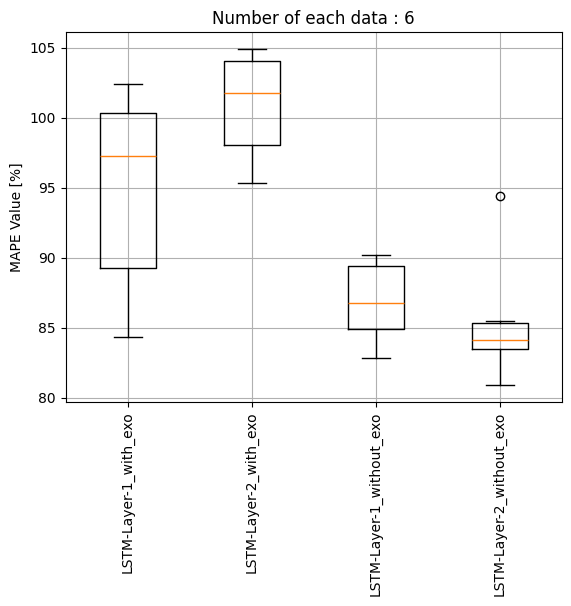

In [42]:
%matplotlib inline 
import matplotlib.pyplot as plt

# リスト1とリスト2を作成
list_layer1 = [95.2,100.7,84.3,99.3,102.4,87.3]
list_layer2 = [104.5,104.9,97.1,95.3,102.7,100.8]
list_layer1_without = [89.8,85.4,90.2,88.1,82.8,84.7]
list_layer2_without = [83.5,85.5,84.7,83.5,94.4,80.9]

# 点数のタプル
points = (list_layer1, list_layer2,list_layer1_without,list_layer2_without)

# 箱ひげ図
fig, ax = plt.subplots()

# 複数リストをタプルで渡す
bp = ax.boxplot(points)

# X軸のラベルを設定
ax.set_xticklabels(['LSTM-Layer-1_with_exo', 'LSTM-Layer-2_with_exo','LSTM-Layer-1_without_exo','LSTM-Layer-2_without_exo'],rotation=90)

# タイトルを設定
plt.title('Number of each data : 6')

# グリッドを追加
plt.grid()
plt.ylabel('MAPE Value [%]')

# 描画
plt.show()